In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the Galtons Height Dataset

In [2]:
df = pd.read_csv('galtons_height_data.csv')

View top 20 lines of data

In [3]:
df.head(n=20)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4
6,2,75.5,66.5,F,65.5,4
7,2,75.5,66.5,F,65.5,4
8,3,75.0,64.0,M,71.0,2
9,3,75.0,64.0,F,68.0,2


Check the columns names and data type of columns

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    int64  
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 42.2+ KB


Check the number of instances

In [5]:
df.shape

(898, 6)

Check the missing values

In [6]:
df.isnull().sum()

Family    0
Father    0
Mother    0
Gender    0
Height    0
Kids      0
dtype: int64

Visualized the data in histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ef8725e20>,
      dtype=object)

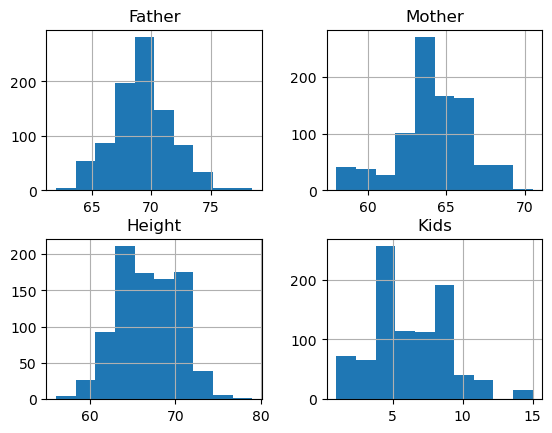

In [53]:
df.drop(['Family'], axis=1).hist()

Explore in term of Gender

In [7]:
df.value_counts(['Gender'])

Gender
M         465
F         433
dtype: int64

F         AxesSubplot(0.1,0.15;0.363636x0.75)
M    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

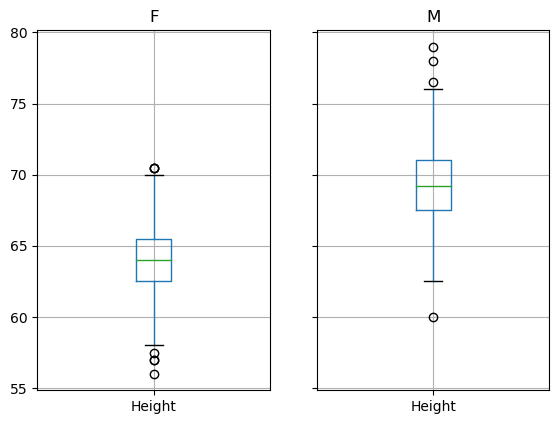

In [16]:
df.groupby("Gender").boxplot(column=['Height'])

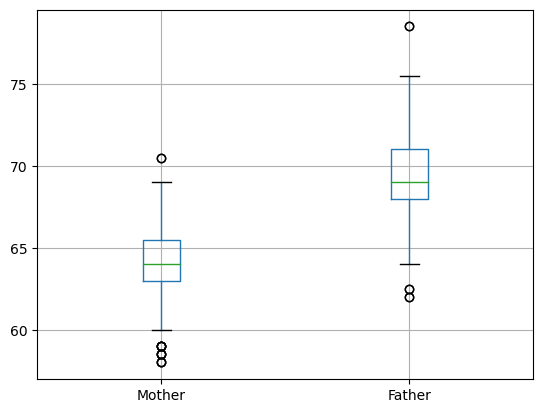

In [25]:
df_parent = df.drop(["Height"], axis=1).drop_duplicates()
df_parent.boxplot(column=['Mother', 'Father'])

In [27]:
df_heights = df.drop(['Family', 'Gender', 'Kids'], axis=1)
df_heights

,Father,Mother,Height
0,78.5,67.0,73.2
1,78.5,67.0,69.2
2,78.5,67.0,69.0
3,78.5,67.0,69.0
4,75.5,66.5,73.5
...,...,...,...
893,68.5,65.0,68.5
894,68.5,65.0,67.7
895,68.5,65.0,64.0
896,68.5,65.0,63.5


Check the correlation between father's, mother's and child height

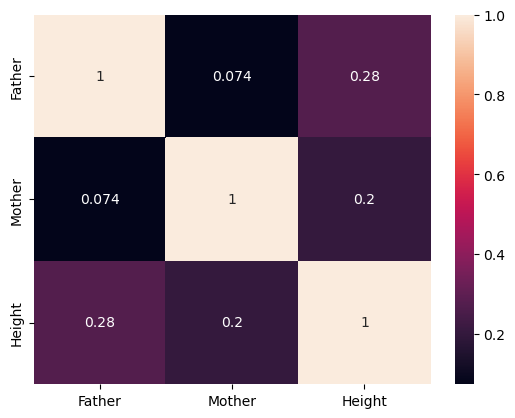

In [35]:
heights_corr_mtx = df_heights.corr()

sns.heatmap(heights_corr_mtx, annot=True)

Check the height correlation differ according to gender

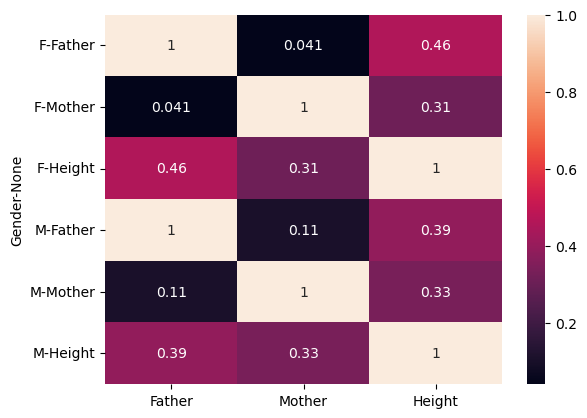

In [39]:
gender_heights_corr_mtx = df.drop(['Family','Kids'], axis=1).groupby('Gender').corr()
sns.heatmap(gender_heights_corr_mtx, annot=True)


Check the correlation between height of child and number o f kids

In [48]:
df_heights_kids = df.loc[:, ["Height", "Kids"]]
df_heights_kids

,Height,Kids
0,73.2,4
1,69.2,4
2,69.0,4
3,69.0,4
4,73.5,4
...,...,...
893,68.5,8
894,67.7,8
895,64.0,8
896,63.5,8


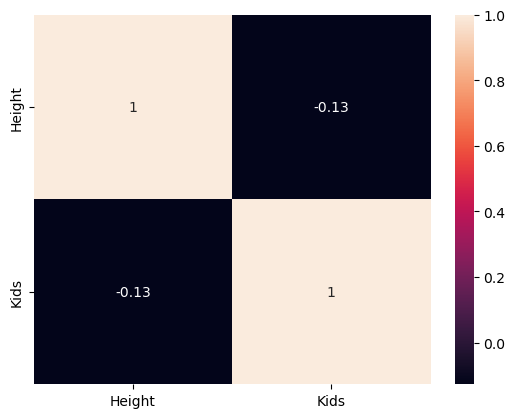

In [46]:
sns.heatmap(df_heights_kids.corr(), annot=True)